In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import jieba
import nltk
from tqdm import tqdm
from wordcloud import WordCloud

In [2]:
with open('dataset/newdic1.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        print(line)
        jieba.add_word(line.strip())

Building prefix dict from the default dictionary ...
Loading model from cache C:\Windows\TEMP\jieba.cache


﻿女人节



Loading model cost 1.899 seconds.
Prefix dict has been built successfully.


手机号

通话

短信


In [3]:
df = pd.read_csv('dataset/message80W.csv', header=None, index_col=0, names=['label', 'message'])
df.head()

,label,message
1,0,商业秘密的秘密性那是维系其商业价值和垄断地位的前提条件之一
2,1,南口阿玛施新春第一批限量春装到店啦   春暖花开淑女裙、冰蓝色公主衫 ...
3,0,带给我们大常州一场壮观的视觉盛宴
4,0,有原因不明的泌尿系统结石等
5,0,23年从盐城拉回来的麻麻的嫁妆


In [4]:
duplicated_df = df[df.duplicated(subset='message') == True]
duplicated_df.head()

,label,message
2225,0,将汽车工程和建筑设计完美融为一体
4222,0,私募对冲招聘量化投资经理助理实习生
10301,0,它是电脑、手机、平板上都能用的云笔记软件
11082,0,分享自无线徐州客户端
12112,1,jE ruigouw.org/?f=xxxxxxxxxxxxxx您好！苹果xS手机只要...


In [5]:
df = df.drop_duplicates(subset='message').reset_index(drop=True)
df.head()

,label,message
0,0,商业秘密的秘密性那是维系其商业价值和垄断地位的前提条件之一
1,1,南口阿玛施新春第一批限量春装到店啦   春暖花开淑女裙、冰蓝色公主衫 ...
2,0,带给我们大常州一场壮观的视觉盛宴
3,0,有原因不明的泌尿系统结石等
4,0,23年从盐城拉回来的麻麻的嫁妆


In [6]:
pos_df = df[df['label'] == 1].reset_index(drop=True)
pos_msg = pos_df['message'].tolist()
neg_df = df[df['label'] == 0].reset_index(drop=True)
neg_msg = neg_df['message'].tolist()

In [7]:
pos_word_list = []
for i in tqdm(range(len(pos_msg))):
    pos_word_list += jieba.lcut(pos_msg[i])

neg_word_list = []
for i in tqdm(range(len(neg_msg))):
    neg_word_list += jieba.lcut(neg_msg[i])

print(pos_word_list[:10])
print(neg_word_list[:10])

100%|██████████| 707451/707451 [01:51<00:00, 6350.73it/s]

['南口', '阿玛施', '新春', '第一批', '限量', '春装', '到', '店', '啦', '\ue310']
['商业秘密', '的', '秘密性', '那', '是', '维系', '其', '商业价值', '和', '垄断']


In [8]:
# 去除停用词
stopwords = []
with open('dataset/stopword.txt', 'r', encoding='gbk') as f:
    for line in f.readlines():
        stopwords.append(line.strip())
stopwords[:10]

['', '】', '【', ',', '!', '会', '的', '日', '月', '"']

In [9]:
pos_word_list = [word for word in pos_word_list if ((word not in stopwords) and ('x' not in word))]
neg_word_list = [word for word in neg_word_list if ((word not in stopwords) and ('x' not in word))]
pos_fdist = nltk.FreqDist(pos_word_list)
neg_fdist = nltk.FreqDist(neg_word_list)

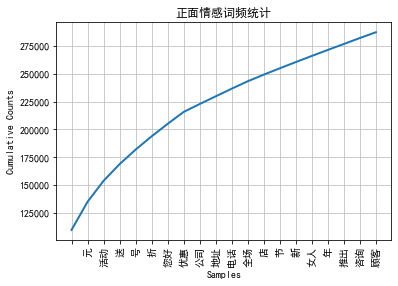

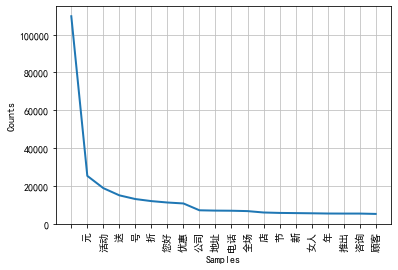

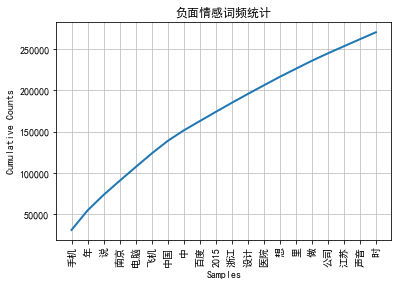

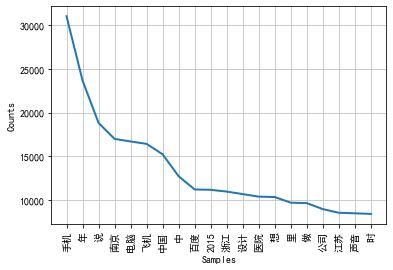

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
matplotlib.rcParams['font.sans-serif'] = 'SimHei'

plt.title('正面情感词频统计')
pos_fdist.plot(20, cumulative=True)
pos_fdist.plot(20, cumulative=False)
plt.title('负面情感词频统计')
neg_fdist.plot(20, cumulative=True)
neg_fdist.plot(20, cumulative=False)


